In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [42]:
def parse_blocks_file(file_path):
    blocks = {}
    with open(file_path, 'r') as file:
        for line in file:
            if line.strip():  # Ignore empty lines
                parts = line.split()
                if parts[0]in ["VSS","N024"]:
                    break
                if len(parts) >= 5:
                    block_name = parts[0]
                    x = int(parts[1])
                    y = int(parts[2])

                    # Extract width and height from the string, removing parentheses
                    print(parts)
                    part1 = parts[5].replace(',', '').replace('(', '')
                    part2 = parts[6].replace('(', '').replace(')', '')
                    width = int(part1)
                    height = int(part2)

                    direction = parts[6] if len(parts) >= 7 else None

                    blocks[block_name] = {'x': x, 'y': y, 'width': width, 'height': height, 'direction': direction}

    return blocks

In [43]:
def generate_image(blocks):
    fig, ax = plt.subplots()

    for block, properties in blocks.items():
        x = properties['x']
        y = properties['y']
        width = properties['width']
        height = properties['height']
        direction = properties['direction']

        print(x,y,width,height)
        # Adjust width and height based on the direction
        if direction in ['W', 'E', 'FE', 'FW']:
            width, height = height, width

        rect = patches.Rectangle((x, y), width, height, fill=True, edgecolor='black')
        ax.add_patch(rect)

        # Add text indicating the direction
#         if direction:
#             ax.text(x + width / 2, y + height / 2, direction, ha='center', va='center', color='white')

    ax.set_xlim(-100, 7000)  # Adjust the axis limits as needed
    ax.set_ylim(-100, 7000)
    ax.set_aspect('equal', 'box')
    #plt.gca().invert_yaxis()  # Invert y-axis to match typical coordinate systems
    plt.show()
    plt.savefig('fig2.pdf')

['M001', '0', '406', 'DIMS', '=', '(1708,', '3234)', ':', 'W']
['M002', '2856', '2660', 'DIMS', '=', '(1554,', '672)', ':', 'FN']
['M003', '1708', '350', 'DIMS', '=', '(1008,', '2184)', ':', 'N']
['M004', '2912', '0', 'DIMS', '=', '(3080,', '1610)', ':', 'E']
['M005', '5460', '4984', 'DIMS', '=', '(532,', '1386)', ':', 'E']
['M006', '4578', '4004', 'DIMS', '=', '(882,', '1862)', ':', 'N']
['M007', '1848', '0', 'DIMS', '=', '(868,', '350)', ':', 'FS']
['M008', '0', '4032', 'DIMS', '=', '(644,', '1246)', ':', 'E']
['M009', '5530', '4004', 'DIMS', '=', '(462,', '980)', ':', 'N']
['M010', '2100', '2548', 'DIMS', '=', '(616,', '294)', ':', 'FN']
['M011', '2394', '3990', 'DIMS', '=', '(378,', '826)', ':', 'S']
['M012', '3500', '1610', 'DIMS', '=', '(798,', '406)', ':', 'E']
['M013', '4480', '2856', 'DIMS', '=', '(672,', '266)', ':', 'FS']
['M014', '3654', '3332', 'DIMS', '=', '(924,', '406)', ':', 'S']
['M015', '0', '0', 'DIMS', '=', '(840,', '406)', ':', 'N']
['M016', '3906', '5530', 'DIMS'

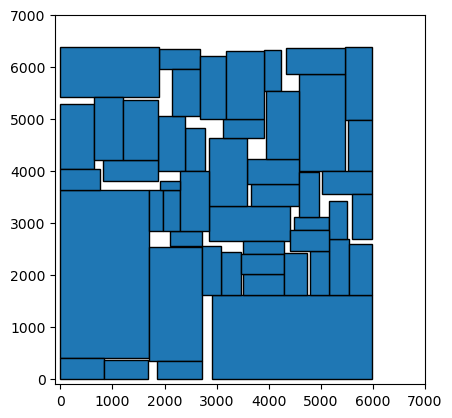

<Figure size 640x480 with 0 Axes>

In [44]:
#file_path = "TESTS/ami49.pl"  # Replace with the actual path to your file
file_path = "Dataset2/out2/out2.pl"  # Replace with the actual path to your file
blocks = parse_blocks_file(file_path)
generate_image(blocks)

['M001', '3150', '0', 'DIMS', '=', '(3234,', '1708)', ':', 'N']
['M002', '4620', '2730', 'DIMS', '=', '(672,', '1554)', ':', 'FW']
['M003', '0', '4102', 'DIMS', '=', '(2184,', '1008)', ':', 'W']
['M004', '3220', '4732', 'DIMS', '=', '(3080,', '1610)', ':', 'W']
['M005', '2520', '2576', 'DIMS', '=', '(1386,', '532)', ':', 'FS']
['M006', '5292', '2730', 'DIMS', '=', '(882,', '1862)', ':', 'FS']
['M007', '2184', '4256', 'DIMS', '=', '(868,', '350)', ':', 'FS']
['M008', '728', '1680', 'DIMS', '=', '(644,', '1246)', ':', 'FW']
['M009', '728', '1218', 'DIMS', '=', '(980,', '462)', ':', 'W']
['M010', '1778', '2338', 'DIMS', '=', '(616,', '294)', ':', 'N']
['M011', '3066', '3108', 'DIMS', '=', '(826,', '378)', ':', 'W']
['M012', '1708', '798', 'DIMS', '=', '(406,', '798)', ':', 'N']
['M013', '0', '3444', 'DIMS', '=', '(672,', '266)', ':', 'FS']
['M014', '1372', '2338', 'DIMS', '=', '(406,', '924)', ':', 'E']
['M015', '0', '0', 'DIMS', '=', '(406,', '840)', ':', 'E']
['M016', '1666', '0', 'DIMS

['M001', '4578', '3136', 'DIMS', '=', '(1708,', '3234)', ':', 'E']
['M002', '2688', '2534', 'DIMS', '=', '(1554,', '672)', ':', 'FS']
['M003', '5292', '854', 'DIMS', '=', '(1008,', '2184)', ':', 'FS']
['M004', '0', '0', 'DIMS', '=', '(1610,', '3080)', ':', 'N']
['M005', '3122', '3206', 'DIMS', '=', '(1386,', '532)', ':', 'S']
['M006', '266', '5278', 'DIMS', '=', '(1862,', '882)', ':', 'FW']
['M007', '0', '4914', 'DIMS', '=', '(868,', '350)', ':', 'FN']
['M008', '2240', '0', 'DIMS', '=', '(644,', '1246)', ':', 'W']
['M009', '2268', '3388', 'DIMS', '=', '(462,', '980)', ':', 'FS']
['M010', '4494', '1694', 'DIMS', '=', '(616,', '294)', ':', 'S']
['M011', '1610', '3010', 'DIMS', '=', '(826,', '378)', ':', 'E']
['M012', '1610', '2604', 'DIMS', '=', '(798,', '406)', ':', 'FW']
['M013', '3514', '3738', 'DIMS', '=', '(266,', '672)', ':', 'W']
['M014', '392', '3080', 'DIMS', '=', '(924,', '406)', ':', 'S']
['M015', '4060', '504', 'DIMS', '=', '(840,', '406)', ':', 'N']
['M016', '3766', '4872', 

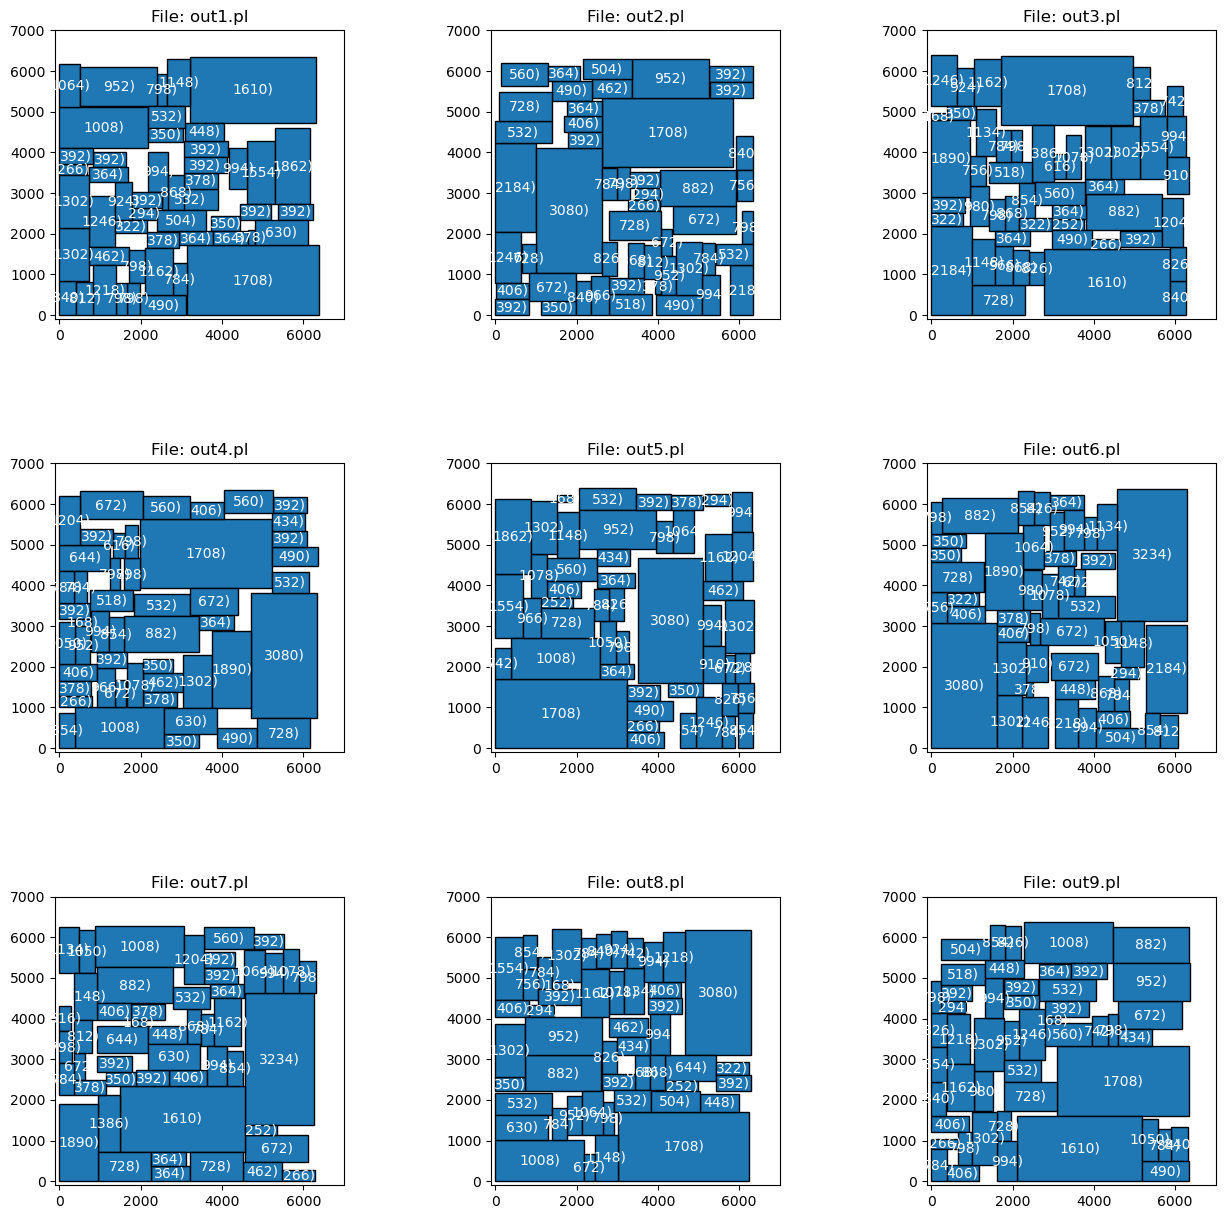

In [46]:
def generate_images_from_files(file_paths):
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))  # Adjust the figure size as needed
    fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust spacing between plots

    for i, file_path in enumerate(file_paths):
        ax = axs[i // 3, i % 3]
        blocks = parse_blocks_file(file_path)

        for block, properties in blocks.items():
            x, y, width, height = properties['x'], properties['y'], properties['width'], properties['height']
            direction = properties.get('direction', None)

            # Adjust width and height based on the direction
            if direction in ['W', 'E', 'FE', 'FW']:
                width, height = height, width

            rect = patches.Rectangle((x, y), width, height, fill=True, edgecolor='black')
            ax.add_patch(rect)

            # Add text indicating the direction
            if direction:
                ax.text(x + width / 2, y + height / 2, direction, ha='center', va='center', color='white')

            ax.set_xlim(-100, 7000)  # Adjust the axis limits as needed
            ax.set_ylim(-100, 7000)
            ax.set_aspect('equal', 'box')
            ax.set_title(f"File: {file_path.split('/')[-1]}")

    plt.show()

# Usage example:
file_paths = [
    "Dataset2/out1/out1.pl",
    "Dataset2/out2/out2.pl",
    "Dataset2/out3/out3.pl",
    "Dataset2/out4/out4.pl",
    "Dataset2/out5/out5.pl",
    "Dataset2/out6/out6.pl",
    "Dataset2/out7/out7.pl",
    "Dataset2/out8/out8.pl",
    "Dataset2/out9/out9.pl",
]
generate_images_from_files(file_paths)